In [3]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from data import load_data, load_config

# slowdelta, fastdelta, slowtheta, fasttheta, alpha, beta, gamma, rms, mouseID, lab, sleepstage, epoch
config = load_config()
data_path = config['data_path']
df = load_data(data_path)
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1958286,0.139606,0.095954,0.214060,0.121142,0.201720,0.156274,0.123541,16.0,5.0,3.0,10794.0
1958287,0.113887,0.122214,0.271802,0.143455,0.170195,0.169966,0.125525,16.0,5.0,3.0,10795.0
1958288,0.096449,0.254481,0.149651,0.123115,0.101740,0.076557,0.097413,16.0,5.0,3.0,10796.0
1958289,0.065317,0.313154,0.243949,0.100223,0.075370,0.135688,0.077541,16.0,5.0,3.0,10797.0


In [4]:
label = 'sleepstage'
features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms']

X = df[features]
y = df[label]

In [5]:
# unique id, L{lab},M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df.head()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0,1


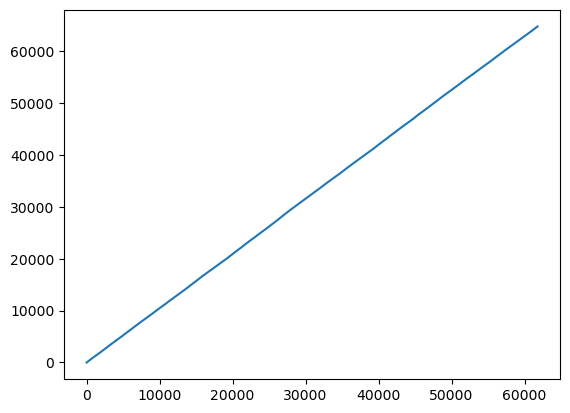

In [67]:
# plot epochs for first 1 mice
import matplotlib.pyplot as plt

mouse1 = df[df['unique_id'] == 1]
plt.plot(mouse1['epoch'])
plt.show()

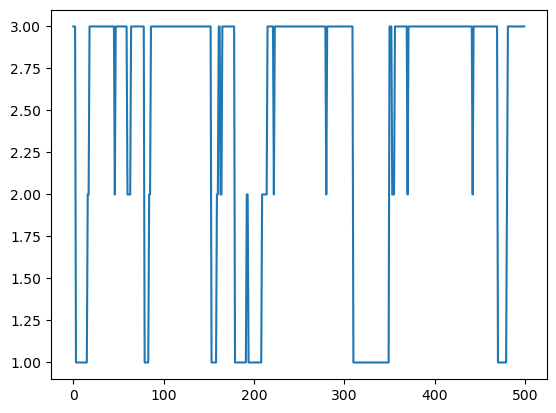

In [69]:
# make hypogram of mouse1 sorted my epoch sort by np.sort(mouse1['epoch']), but plot mouse1['sleepstage']
df2 = mouse1.sort_values(by='epoch')
plt.plot(np.array(df2['sleepstage'])[:500])
plt.show()

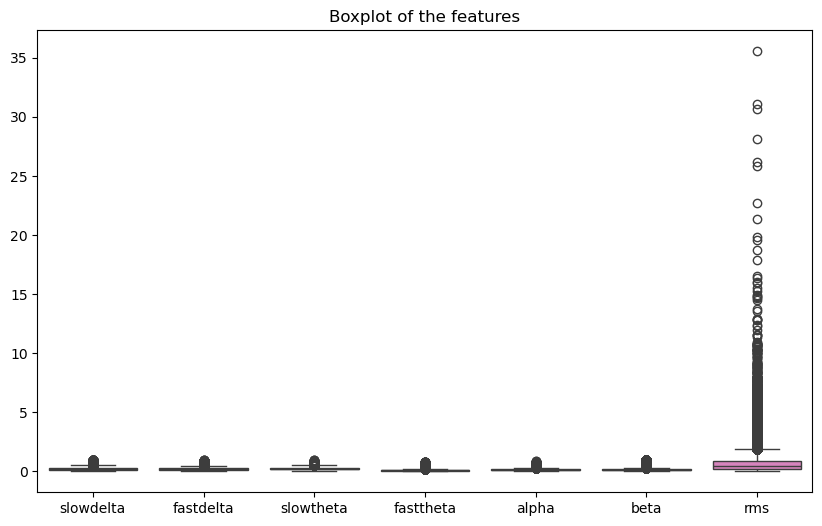

In [70]:
# boxplot of the features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Boxplot of the features')
plt.show()

In [71]:
# scale the features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# # convert to pandas
# X = pd.DataFrame(X, columns=features)
# X

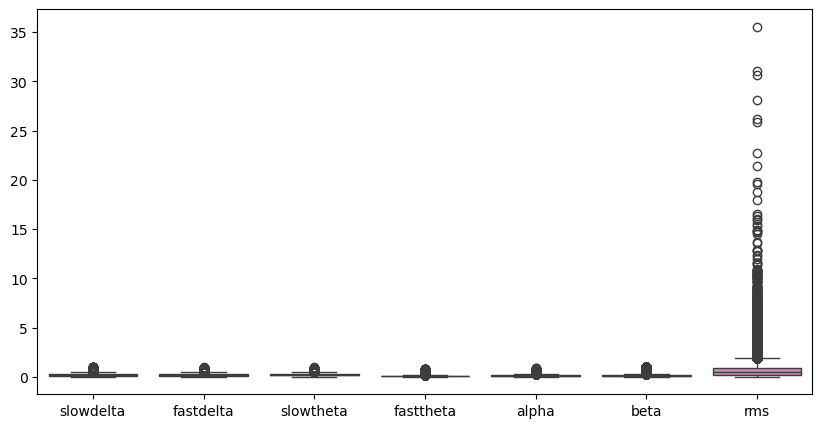

In [72]:
# boxplots of the features with sns
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=X, ax=ax)
plt.show()

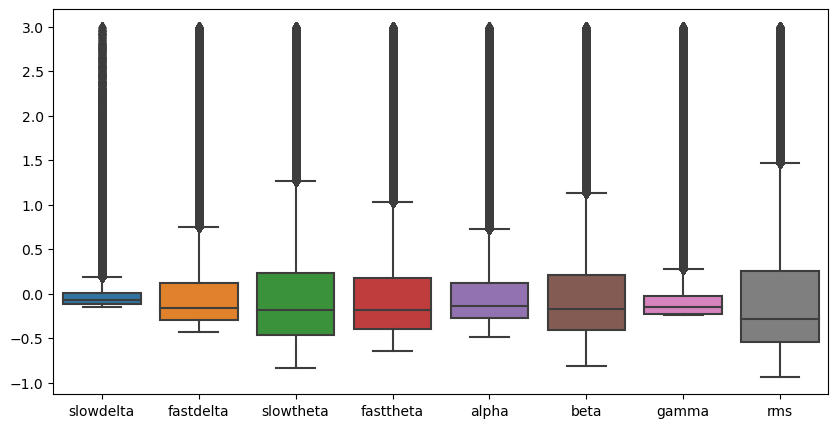

In [138]:
# remove outliers
from scipy import stats
z = np.abs(stats.zscore(X))
threshold = 3
outliers = np.where(z > threshold)
# remove the outliers
X = X[(z < threshold).all(axis=1)]
y = y[(z < threshold).all(axis=1)]
# boxplots of the features with sns
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=X, ax=ax)
plt.show()

In [139]:
# do pca and show the first 2 components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

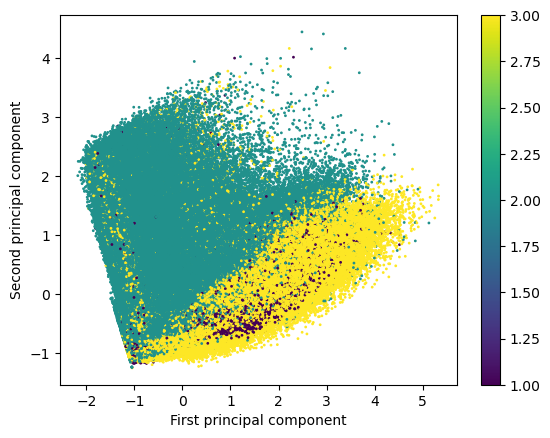

In [141]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=1)
# 1=REM, 2=Wake og 3=NREM
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

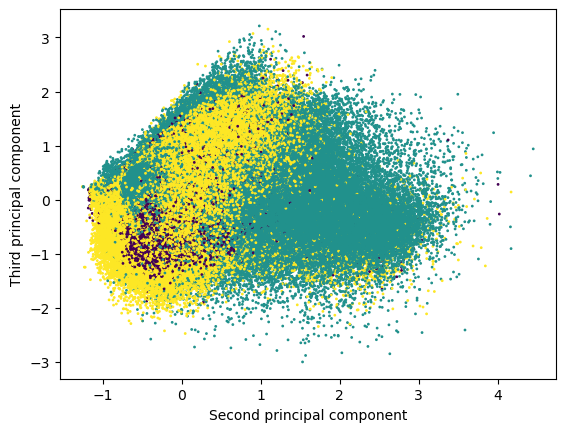

In [54]:
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=1)
plt.xlabel('Second principal component')
plt.ylabel('Third principal component')
plt.show()

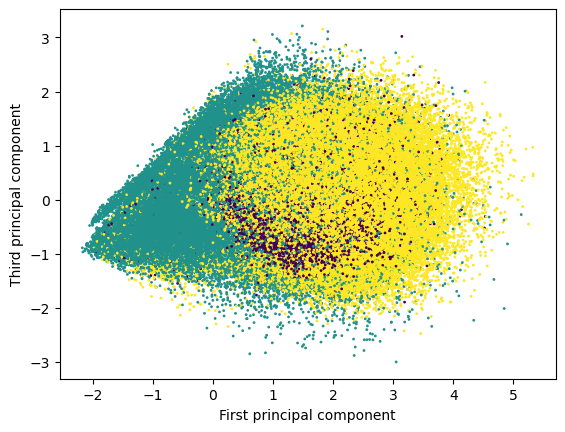

In [56]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap='viridis', s=1)
plt.xlabel('First principal component')
plt.ylabel('Third principal component')
plt.show()

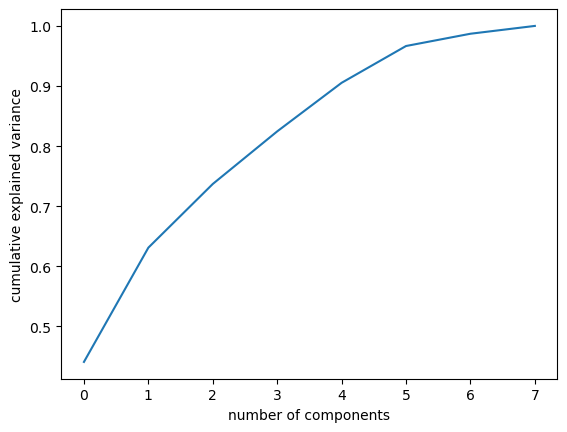

In [49]:
# how much variance is explained by each component
pca = PCA(n_components=8)
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [213]:
import numpy as np

def PCHA(X, noc, I, U, delta=0, **kwargs):
    # Principal Convex Hull Analysis (PCHA) / Archetypal Analysis

    # Initialize parameters
    conv_crit = kwargs.get('conv_crit', 1e-6)
    max_iter = kwargs.get('max_iter', 500)

    if len(X.shape) != 2:
        raise ValueError("X must be a 2D array")

    if delta is None:
        delta = 0

    if U is None:
        U = np.arange(X.shape[1])

    if I is None:
        I = np.arange(X.shape[1])

    SST = np.sum(X[:, U] * X[:, U])

    # Initialize C
    if 'C' in kwargs:
        C = kwargs['C']
    else:
        # Initialize by furthest sum
        i = FurthestSum(X[:, I], noc, np.random.randint(0, len(I)))
        # dont include the frist index
        i = i[1:]
        print(i)
        C = np.zeros((len(I), noc))
        C[i, np.arange(noc)] = 1

    XC = np.dot(X[:, I], C)

    muS = 1
    muC = 1
    mualpha = 1

    # Initialize S
    if 'S' in kwargs:
        S = kwargs['S']
        CtXtXC = np.dot(XC.T, XC)
        XSt = np.dot(X[:, U], S.T)
        SSt = np.dot(S, S.T)
        SSE = SST - 2 * np.sum(XC * XSt) + np.sum(CtXtXC * SSt)
    else:
        XCtX = np.dot(XC.T, X[:, U])
        CtXtXC = np.dot(XC.T, XC)
        S = -np.log(np.random.rand(noc, len(U)))
        S = S / np.sum(S, axis=0)
        SSt = np.dot(S, S.T)
        SSE = SST - 2 * np.sum(XCtX * S) + np.sum(CtXtXC * SSt)
        S, SSE, muS, SSt = Supdate(S, XCtX, CtXtXC, muS, SST, SSE, 25)

    # Algorithm iteration
    iter_count = 0
    dSSE = np.inf
    varexpl = (SST - SSE) / SST

    while np.abs(dSSE) >= conv_crit * np.abs(SSE) and iter_count < max_iter and varexpl < 0.9999:
        iter_count += 1
        told = np.copy(iter_count)
        SSE_old = np.copy(SSE)

        # Update C and alpha
        XSt = np.dot(X[:, U], S.T)
        C, SSE, muC, mualpha, CtXtXC, XC = Cupdate(X[:, I], XSt, XC, SSt, C, delta, muC, mualpha, SST, SSE, 10)

        # Update S
        XCtX = np.dot(XC.T, X[:, U])
        S, SSE, muS, SSt = Supdate(S, XCtX, CtXtXC, muS, SST, SSE, 10)

        dSSE = SSE_old - SSE
        t1 = np.copy(iter_count)
        if iter_count % 10 == 0:
            varexpl = (SST - SSE) / SST
            #print('%12.0f | %12.4f | %12.4e | %12.4e | %12.4e | %12.4e | %12.4e | %12.4f' %
            #      (iter_count, varexpl, SSE, dSSE / np.abs(SSE), muC, mualpha, muS, t1 - told))

    # Sort components according to importance
    ind = np.argsort(np.sum(S, axis=1))[::-1]
    S = S[ind, :]
    C = C[:, ind]
    XC = XC[:, ind]

    return XC, S, C, SSE, varexpl

def mgetopt(opts, varname, default, **kwargs):
    if varname in opts:
        var = opts[varname]
    else:
        var = default
    for k, v in kwargs.items():
        if k == 'instrset':
            if v not in var:
                print(f"Wrong argument {varname} = '{var}' - Using default : {varname} = '{default}'")
                var = default
        else:
            raise ValueError("Wrong option")

def Supdate(S, XCtX, CtXtXC, muS, SST, SSE, niter):
    noc, J = S.shape
    e = np.ones((noc, 1))
    for k in range(niter):
        SSE_old = SSE
        g = (np.dot(CtXtXC, S) - XCtX) / (SST / J)
        g = g - e * np.sum(g * S, axis=0)
        stop = 0
        Sold = np.copy(S)
        while not stop:
            S = Sold - g * muS
            S[S < 0] = 0
            S = S / (e * np.sum(S, axis=0))
            SSt = np.dot(S, S.T)  # Re-compute SSt based on S
            SSE = SST - 2 * np.sum(XCtX * S) + np.sum(CtXtXC * SSt)
            if SSE <= SSE_old * (1 + 1e-9):
                muS = muS * 1.2
                stop = 1
            else:
                muS = muS / 2
    return S, SSE, muS, SSt

def Cupdate(X, XSt, XC, SSt, C, delta, muC, mualpha, SST, SSE, niter):
    J, noc = C.shape
    if delta is None:
        delta = 0
    if delta != 0:
        alphaC = np.sum(C, axis=0) + np.finfo(float).eps  # Add epsilon to avoid division by zero
        C = np.dot(C, np.diag(1. / alphaC))
    e = np.ones(J)
    XtXSt = np.dot(X.T, XSt)
    for k in range(niter):
        SSE_old = SSE
        g = (np.dot(X.T, np.dot(XC, SSt)) - XtXSt) / SST
        if delta != 0:
            g = np.dot(g, np.diag(alphaC))
        g = g - np.sum(g * C, axis=0)
        stop = 0
        Cold = np.copy(C)
        while not stop:
            C = Cold - muC * g
            C[C < 0] = 0
            
            nC = np.sum(C, axis=0) + np.finfo(float).eps
            D = np.diag(1. / nC)
            C = np.dot(C, D)

            if delta != 0:
                Ct = np.dot(C, np.diag(alphaC))
            else:
                Ct = np.copy(C)

            XC = np.dot(X, Ct)
            CtXtXC = np.dot(XC.T, XC)
            SSE = SST - 2 * np.sum(XC * XSt) + np.sum(CtXtXC * SSt)

            if SSE <= SSE_old * (1 + 1e-9):
                muC = muC * 1.2
                stop = 1
            else:
                muC = muC / 2

        SSE_old = SSE
        if delta != 0:
            g = (np.diag(np.dot(CtXtXC, SSt)) / alphaC - np.sum(C * XtXSt, axis=0)) / (SST * J)
            stop = 0
            alphaCold = np.copy(alphaC)
            while not stop:
                alphaC = alphaCold - mualpha * g
                alphaC[alphaC < 1 - delta] = 1 - delta
                alphaC[alphaC > 1 + delta] = 1 + delta
                XCt = np.dot(XC, np.diag(alphaC / alphaCold))
                CtXtXC = np.dot(XCt.T, XCt)
                SSE = SST - 2 * np.sum(XCt * XSt) + np.sum(CtXtXC * SSt)
                if SSE <= SSE_old * (1 + 1e-9):
                    mualpha = mualpha * 1.2
                    stop = 1
                    XC = np.copy(XCt)
                else:
                    mualpha = mualpha / 2

    if delta != 0:
        D = np.diag(alphaC + np.finfo(float).eps)
        C = np.dot(C, D)

    return C, SSE, muC, mualpha, CtXtXC, XC


def FurthestSum(K, noc, i, exclude=None):
    if exclude is None:
        exclude = []
        
    I, J = K.shape
    index = np.arange(J)
    index[exclude] = 0
    index[i] = 0
    ind_t = i
    sum_dist = np.zeros(J)
    
    if J > noc * I:  # Fast implementation for large scale number of observations
        Kt = K
        Kt2 = np.sum(Kt ** 2, axis=0)
        
        for k in range(noc + 10):
            if k > noc - 1:  # Remove initial seed
                Kq = np.dot(Kt[:, i[0]].T, Kt)
                sum_dist -= np.sqrt(Kt2 - 2 * Kq + Kt2[i[0]])
                index[i[0]] = i[0]
                i = i[1:]
                
            t = np.where(index)[0]
            Kq = np.dot(Kt[:, ind_t].T, Kt)
            sum_dist += np.sqrt(Kt2 - 2 * Kq + Kt2[ind_t])
            ind, = np.where(index[t])
            max_ind = np.argmax(sum_dist[t[ind]])
            ind_t = t[ind[max_ind]]
            i = np.append(i, ind_t)
            index[ind_t] = 0
            
    else:
        if I != J or np.sum(K - K.T) != 0:  # Generate kernel if K is not a kernel matrix
            Kt = K
            K = np.dot(Kt.T, Kt)
            K = np.sqrt(np.tile(np.diag(K)[:, None], J) - 2 * K + np.tile(np.diag(K)[None, :], (J, 1)))
        
        Kt2 = np.diag(K)
        
        for k in range(noc + 10):
            if k > noc - 1:
                sum_dist -= np.sqrt(Kt2 - 2 * K[i[0], :] + Kt2[i[0]])
                index[i[0]] = i[0]
                i = i[1:]
                
            t = np.where(index)[0]
            sum_dist += np.sqrt(Kt2 - 2 * K[ind_t, :] + Kt2[ind_t])
            ind, = np.where(index[t])
            max_ind = np.argmax(sum_dist[t[ind]])
            ind_t = t[ind[max_ind]]
            i = np.append(i, ind_t)
            index[ind_t] = 0
            
    return i

[224 353 275 402  51]
[223 224 353 275 402]
[ 51 402 223 353 224]


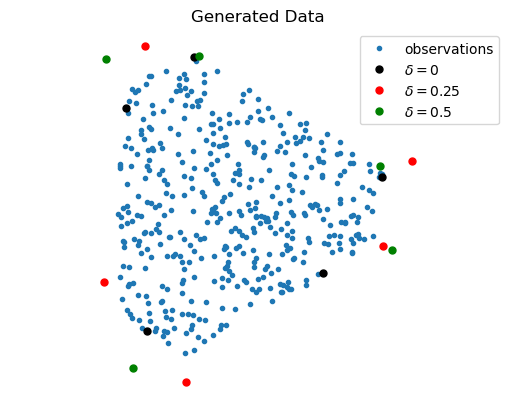

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 500  # Number of observations
tresh = 0.8  # Level of truncation of simplex
DD = 3  # Dimensionality of simplex

# Generate synthetic data
XC = np.array([[np.cos(0), np.cos(2*np.pi/3), np.cos(2*np.pi/3*2)],
                [np.sin(0), np.sin(2*np.pi/3), np.sin(2*np.pi/3*2)]])
S = -np.log(np.random.rand(DD, N))
S = S / np.sum(S, axis=0)  # Normalize
I, J = np.where(S > tresh)
S = np.delete(S, J, axis=1)
NN = S.shape[1]
sigma = 0.0
X = np.dot(XC, S) + sigma * np.random.randn(2, NN)

# Plot the generated data
plt.figure()
plt.plot(X[0], X[1], '.')
plt.title('Generated Data')

# Estimate the AA/PCH model using PCHA function
noc = 5  # Number of components
ms2 = 10  # Width of line in generated plot
delta_values = [0, 0.25, 1]

colors = ['black', 'red', 'green']

for k, delta in enumerate(delta_values):
    # PCHA function call here
    XC, S, C, SSE, varexpl = PCHA(X, noc, np.arange(X.shape[1]), np.arange(X.shape[1]), delta)
    plt.plot(XC[0], XC[1], '.', color=colors[k], markersize=ms2)

plt.legend(['observations', r'$\delta=0$', r'$\delta=0.25$', r'$\delta=0.5$'])
plt.axis('off')
plt.axis('equal')
plt.show()

In [19]:
from importlib import reload
import AA.CGD_model
from AA.CGD_model import *
reload(AA.CGD_model)

<module 'AA.CGD_model' from 'c:\\Users\\AugustPC\\OneDrive\\School\\4S\\Project\\sleepy_mice\\src\\..\\AA\\CGD_model.py'>

In [20]:
import torch
from sklearn.model_selection import train_test_split

num_comp = 3
model = "AA"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values)
X_test = torch.tensor(X_test.values)

# If you have data of varying dimensions, such as EEG/MEG, then the data for these should
#     be in each their own tensor, and the tensors should be input as a dictionary, e.g., X = {'EEG':EEGdata,'MEG':MEGdata}.
# X_train = X_train.unsqueeze(0)
X_train_dict = {'X':X_train}
X_test_dict = {'X':X_test}
#  __init__(self,  num_comp, X, Xtilde=None, model="SPCA", G_idx=None,lambda1=None,lambda2=None,init=None):
# Assuming X_train is a dictionary of torch tensors and X_keys is a list of keys
cgd_model = CGD(num_comp, X_train_dict, model=model)

optimizer = torch.optim.AdamW(cgd_model.parameters(), lr=0.01)

# Train the model
num_epochs = 2000
for epoch in range(num_epochs):
    cgd_model.train()
    optimizer.zero_grad()
    loss = cgd_model()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')


Initializing model: AA
Model initialized in 0.07846498489379883 seconds
Epoch [0/2000], Loss: 7113670.1293
Epoch [10/2000], Loss: 7048376.1159
Epoch [20/2000], Loss: 6959118.1085
Epoch [30/2000], Loss: 6806494.8131
Epoch [40/2000], Loss: 6569160.1314
Epoch [50/2000], Loss: 6257261.8358
Epoch [60/2000], Loss: 5902912.8529
Epoch [70/2000], Loss: 5540908.3862
Epoch [80/2000], Loss: 5197386.1815
Epoch [90/2000], Loss: 4888836.3811
Epoch [100/2000], Loss: 4622996.1772
Epoch [110/2000], Loss: 4398052.6209
Epoch [120/2000], Loss: 4205523.5509
Epoch [130/2000], Loss: 4039067.9984
Epoch [140/2000], Loss: 3899306.2206
Epoch [150/2000], Loss: 3789472.3292
Epoch [160/2000], Loss: 3708402.4895
Epoch [170/2000], Loss: 3649617.7932
Epoch [180/2000], Loss: 3606210.0951
Epoch [190/2000], Loss: 3573256.9824
Epoch [200/2000], Loss: 3547350.1450
Epoch [210/2000], Loss: 3526239.2905
Epoch [220/2000], Loss: 3508485.5097
Epoch [230/2000], Loss: 3493147.7535
Epoch [240/2000], Loss: 3479616.7221
Epoch [250/200

Initializing model: AA
Model initialized in 0.016985654830932617 seconds


  0%|          | 0/10000 [00:00<?, ?it/s]

  4%|▎         | 364/10000 [00:00<00:19, 490.99it/s]


Tolerance reached at 365 number of iterations


Text(0, 0.5, 'SSE')

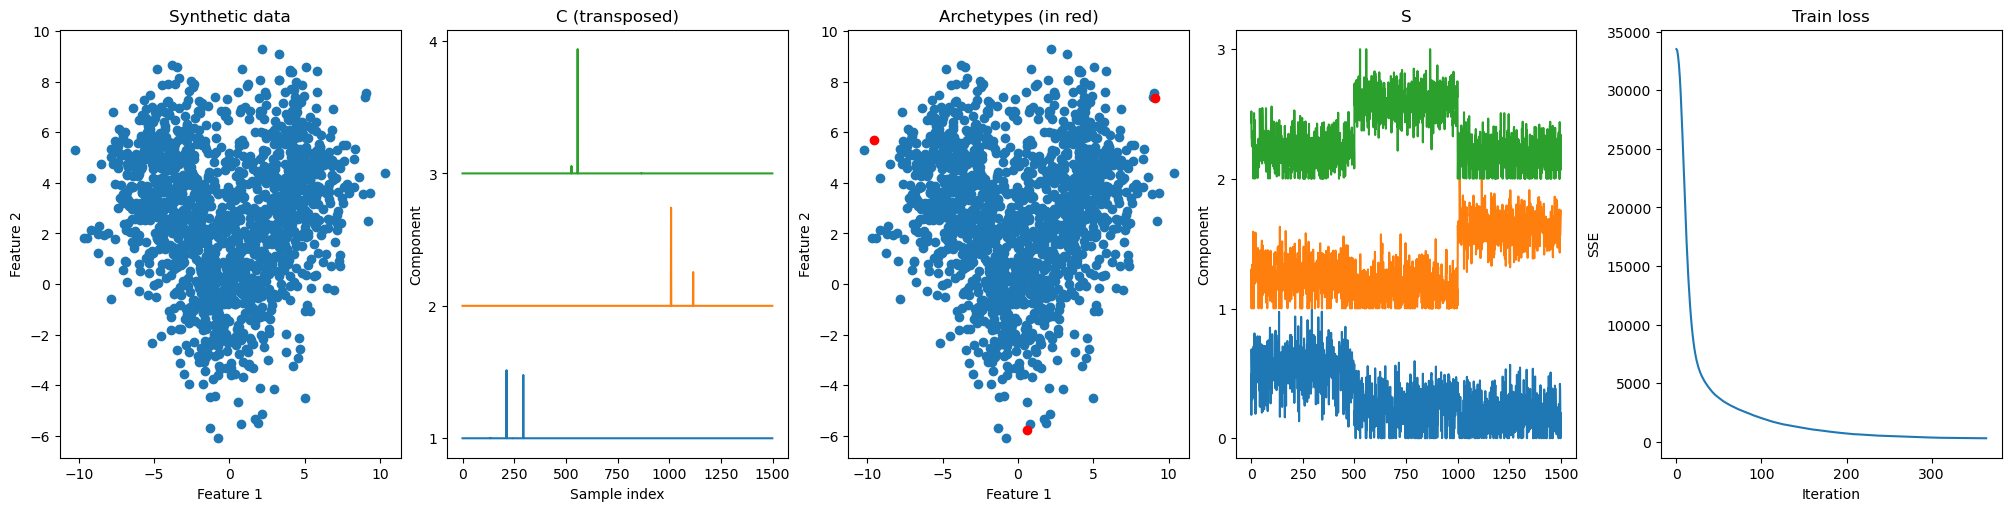

In [14]:
import torch
import numpy as np
from AA import CGD_model, CGD_trainer
import matplotlib.pyplot as plt

# construct 3 blobs of data
np.random.seed(0)
n_samples = 500
X2 = np.concatenate([np.random.normal([0, 0], 2, (n_samples, 2)),
                    np.random.normal([4, 4], 2, (n_samples, 2)),
                    np.random.normal([-4, 4], 2, (n_samples, 2))]).T

data = {'X':torch.tensor(X2)}

# initialize an AA model with 4 components, where the data is provided in a dictionary
K = 3
model = CGD_model.CGD(X=data,num_comp=K,model='AA')

# specify an optimizer (don't set LR too high)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# train the model, the model stops training when the difference between lowest and second-lowest of the 5 latest losses is less than 1e-8
loss,_ = CGD_trainer.Optimizationloop(model=model,optimizer=optimizer,max_iter=10000,tol=1e-4)

# get and detach parameters
C,S = model.get_model_params()
# C = C.detach().numpy()
# S = S.detach().numpy()
C = C.numpy()
S = S.numpy()

# plots
fig,axs = plt.subplots(1,5,figsize=(20,5),layout='constrained')
axs[0].scatter(X[0,:],X[1,:])
axs[0].set_title('Synthetic data')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
for k in range(K):
    axs[1].plot(C[:,k]+k)
axs[1].set_title('C (transposed)')
axs[1].set_yticks([0,1,2,3])
axs[1].set_yticklabels(['1','2','3','4'])
axs[1].set_ylabel('Component')
axs[1].set_xlabel('Sample index')

axs[2].scatter(X[0,:],X[1,:])
#plot the archetypes on top of real data
XC = X@C
axs[2].scatter(XC[0,:],XC[1,:],c='r')
axs[2].set_title('Archetypes (in red)')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

for k in range(K):
    axs[3].plot(S[0,k,:]+k)
axs[3].set_title('S')
axs[3].set_yticks([0,1,2,3])
axs[1].set_yticklabels(['1','2','3','4'])
axs[3].set_ylabel('Component')
axs[1].set_xlabel('Sample index')

axs[4].plot(loss)
axs[4].set_title('Train loss')
axs[4].set_xlabel('Iteration')
axs[4].set_ylabel('SSE')
#fig.savefig('AA_example.png')

In [7]:
import torch

# Step 1: Prepare input data (example)
X_train = torch.tensor(X.values)

xdict = {'X':X_train}

# Step 2: Create the model
num_comp = 3
model = "AA"
cgd_model = CGD(num_comp, xdict, model=model)

# Step 3: Create the optimizer
optimizer = torch.optim.AdamW(cgd_model.parameters(), lr=0.01)

# Step 4: Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    cgd_model.train()
    optimizer.zero_grad()
    loss = cgd_model()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

NameError: name 'CGD' is not defined

In [32]:
cgd_model.get_model_params()

(tensor([[0.0087, 0.0240, 0.0106],
         [0.3129, 0.0341, 0.0229],
         [0.1214, 0.0290, 0.0147],
         [0.2428, 0.0379, 0.0443],
         [0.2778, 0.0413, 0.0740],
         [0.0221, 0.0366, 0.1497],
         [0.0070, 0.0131, 0.6720],
         [0.0073, 0.7840, 0.0119]], dtype=torch.float64),
 tensor([[0.9644, 0.9739, 0.9705, 0.9677, 0.9393, 0.6410, 0.0069, 0.0176],
         [0.0169, 0.0088, 0.0119, 0.0105, 0.0174, 0.0127, 0.0079, 0.9687],
         [0.0187, 0.0174, 0.0175, 0.0218, 0.0432, 0.3463, 0.9852, 0.0137]],
        dtype=torch.float64))

In [30]:
cgd_model.G

Parameter containing:
tensor([[-1.4142, -1.3994, -1.1920],
        [ 2.1639, -1.0505, -0.4177],
        [ 1.2170, -1.2105, -0.8604],
        [ 1.9102, -0.9441,  0.2397],
        [ 2.0447, -0.8587,  0.7532],
        [-0.4885, -0.9795,  1.4583],
        [-1.6321, -2.0049,  2.9600],
        [-1.5938,  2.0854, -1.0730]], dtype=torch.float64, requires_grad=True)

In [31]:
cgd_model.S

Parameter containing:
tensor([[ 2.5497,  2.9488,  2.7345,  2.9826,  2.7617,  2.4594, -2.0100, -1.6384],
        [-1.4927, -1.7592, -1.6636, -1.5426, -1.2253, -1.4617, -1.8737,  2.3693],
        [-1.3944, -1.0789, -1.2797, -0.8089, -0.3168,  1.8437,  2.9508, -1.8905]],
       dtype=torch.float64, requires_grad=True)

In [6]:
# how many unique combinations of lab and mouseIDS are there?
number_of_unique_combinations = df.groupby(['lab', 'mouseID']).ngroups
number_of_unique_combinations

150

In [8]:
# show unique ids for each lab
unique_ids = df.groupby('lab')['mouseID'].unique()
unique_ids

lab
1.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
2.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
3.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
4.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
5.0    [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,...
Name: mouseID, dtype: object

In [9]:
# count amount of unique ids for each lab
unique_ids_count = df.groupby('lab')['mouseID'].nunique()
unique_ids_count

lab
1.0    10
2.0    34
3.0    55
4.0    33
5.0    18
Name: mouseID, dtype: int64

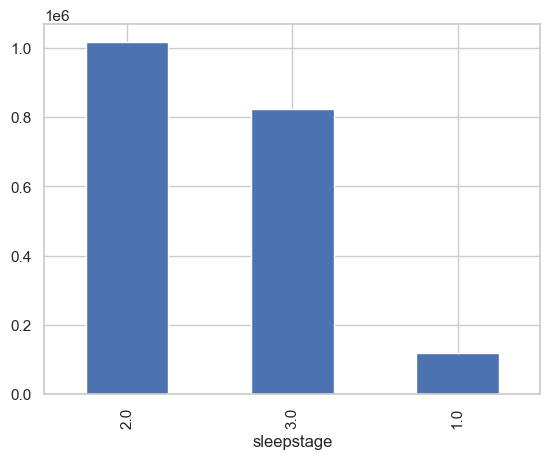

In [10]:
# plot the number of sleepstages for each mouse
import matplotlib.pyplot as plt
df['sleepstage'].value_counts().plot(kind='bar')
plt.show()

In [47]:
# unique id, L{lab},M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df = df.sort_values('unique_id')
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,gamma,rms,mouseID,lab,sleepstage,epoch,unique_id
0,528.584023,370.200447,235.735391,205.805979,75.988092,13.273196,1.274694,0.464923,1.0,1.0,3.0,1.0,1
5,21.194293,50.978380,250.735819,36.404479,20.545351,4.653293,0.851872,0.277934,1.0,1.0,1.0,8.0,1
6,53.628395,106.082687,196.489491,70.965690,25.831856,3.416144,1.316352,0.314129,1.0,1.0,1.0,9.0,1
7,29.863022,14.081502,238.262047,96.871908,15.845133,7.503752,0.768856,0.282011,1.0,1.0,1.0,10.0,1
8,41.136172,98.846267,198.580331,55.813451,21.053691,5.976469,0.930935,0.310812,1.0,1.0,1.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871983,249.454144,128.805786,191.272019,50.904907,32.402198,7.799397,2.537662,1.829342,9.0,5.0,2.0,21.0,150
1871981,125.116494,46.962697,81.190012,35.686128,13.775305,7.552090,2.985910,1.755212,9.0,5.0,2.0,19.0,150
1871982,122.507580,83.761590,151.116935,66.723927,29.870618,6.247822,2.106869,1.705638,9.0,5.0,2.0,20.0,150
1871989,44.803806,231.954309,84.571883,35.151730,16.355927,9.516937,3.213152,1.700163,9.0,5.0,2.0,27.0,150


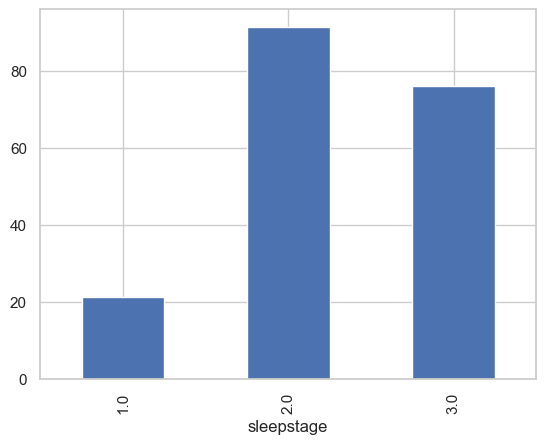

In [76]:
# plot alpha for each sleepstage for mice 1
df[df['unique_id'] == 47].groupby('sleepstage')['alpha'].mean().plot(kind='bar')
plt.show()

In [87]:
# Calculate mean alpha values for each sleep stage for each unique_id
mean_alpha_by_id = df.groupby(['unique_id', 'sleepstage'])['alpha'].mean().unstack()

# Extract mean alpha values for sleep stage 2
mean_alpha_stage2 = mean_alpha_by_id[2]

# Calculate the maximum mean alpha value for each unique_id across all sleep stages
max_mean_alpha_by_id = mean_alpha_by_id.max(axis=1)

# Count the number of mice in sleep stage 2 where the mean alpha is the highest across its own sleep stages
count_highest_alpha_stage2 = sum(mean_alpha_stage2 >= max_mean_alpha_by_id)

# Display the count
print("Number of mice with the highest mean alpha in sleep stage 2:", count_highest_alpha_stage2)

Number of mice with the highest mean alpha in sleep stage 2: 19


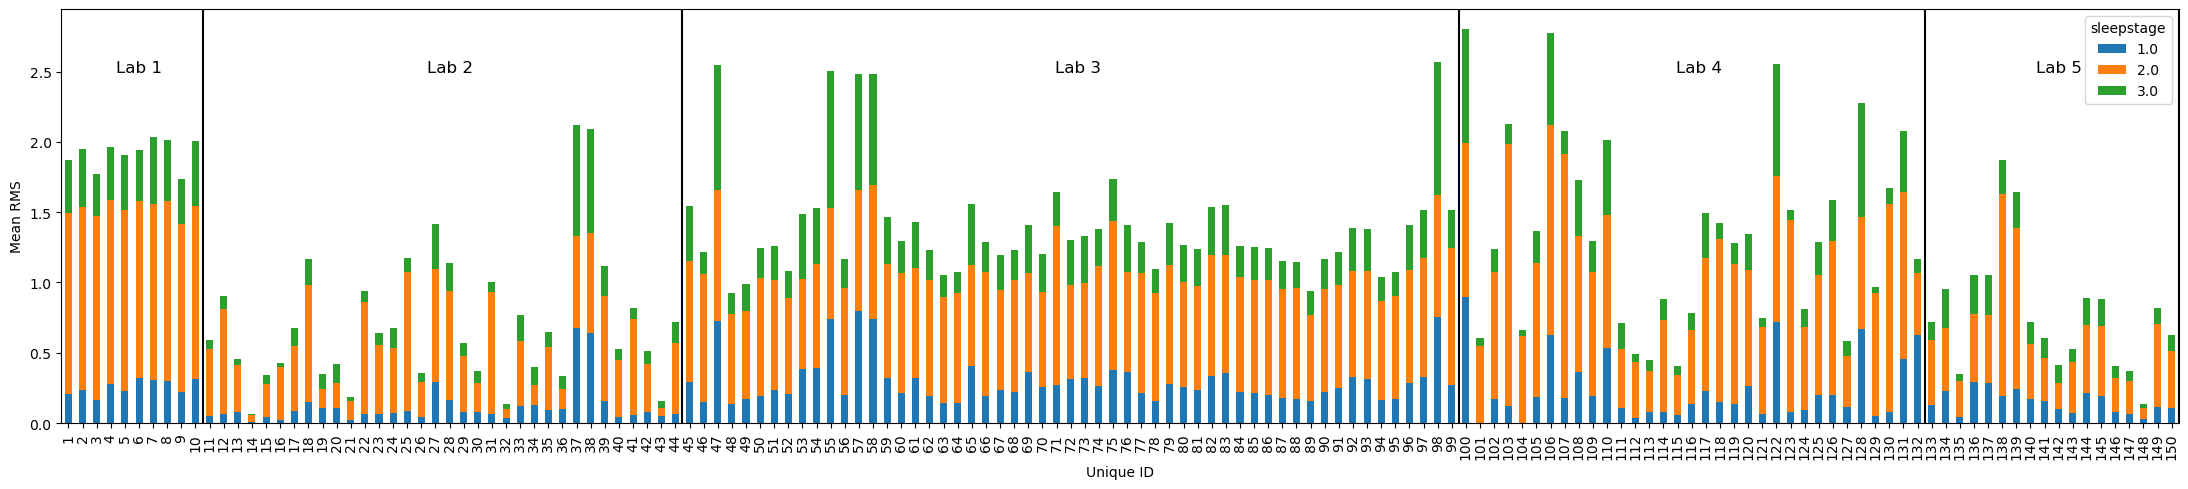

In [102]:
# plot mean_alpha_by_id, so there are 150 bars for each sleepstage
mean_alpha_by_id = df.groupby(['unique_id', 'sleepstage'])['rms'].mean().unstack().fillna(0)
mean_alpha_by_id.plot(kind='bar', stacked=True)
# make plot wider
plt.gcf().set_size_inches(22, 5)
# draw a line if its a new lab
labindex = np.array(df.groupby('lab')['mouseID'].nunique())
labindex_cum = np.cumsum(labindex)

for i in range(len(labindex_cum)):
    plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
    # text at the top, in the middle of each lab
    plt.text(labindex_cum[i]-labindex[i]/2, 2.5, 'Lab ' + str(i+1), fontsize=12, ha='center')

plt.xlabel('Unique ID')
plt.ylabel('Mean RMS')
plt.tight_layout()
plt.show()

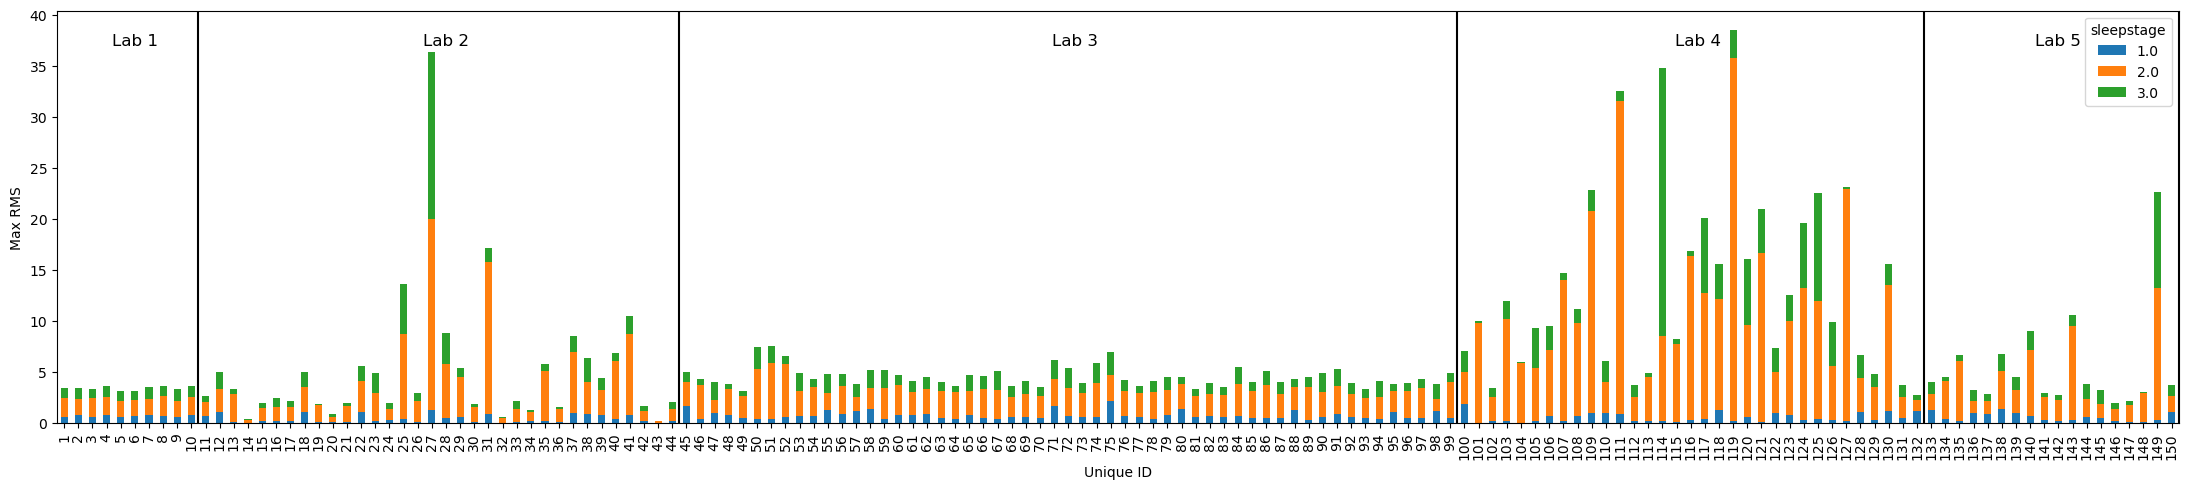

In [101]:
# plot mean_alpha_by_id, so there are 150 bars for each sleepstage
mean_alpha_by_id = df.groupby(['unique_id', 'sleepstage'])['rms'].max().unstack().fillna(0)
mean_alpha_by_id.plot(kind='bar', stacked=True)
# make plot wider
plt.gcf().set_size_inches(22, 5)
# draw a line if its a new lab
labindex = np.array(df.groupby('lab')['mouseID'].nunique())
labindex_cum = np.cumsum(labindex)

for i in range(len(labindex_cum)):
    plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
    # text at the top, in the middle of each lab
    plt.text(labindex_cum[i]-labindex[i]/2, 37, 'Lab ' + str(i+1), fontsize=12, ha='center')

# axis labels
plt.xlabel('Unique ID')
plt.ylabel('Max RMS')
plt.tight_layout()
plt.show()

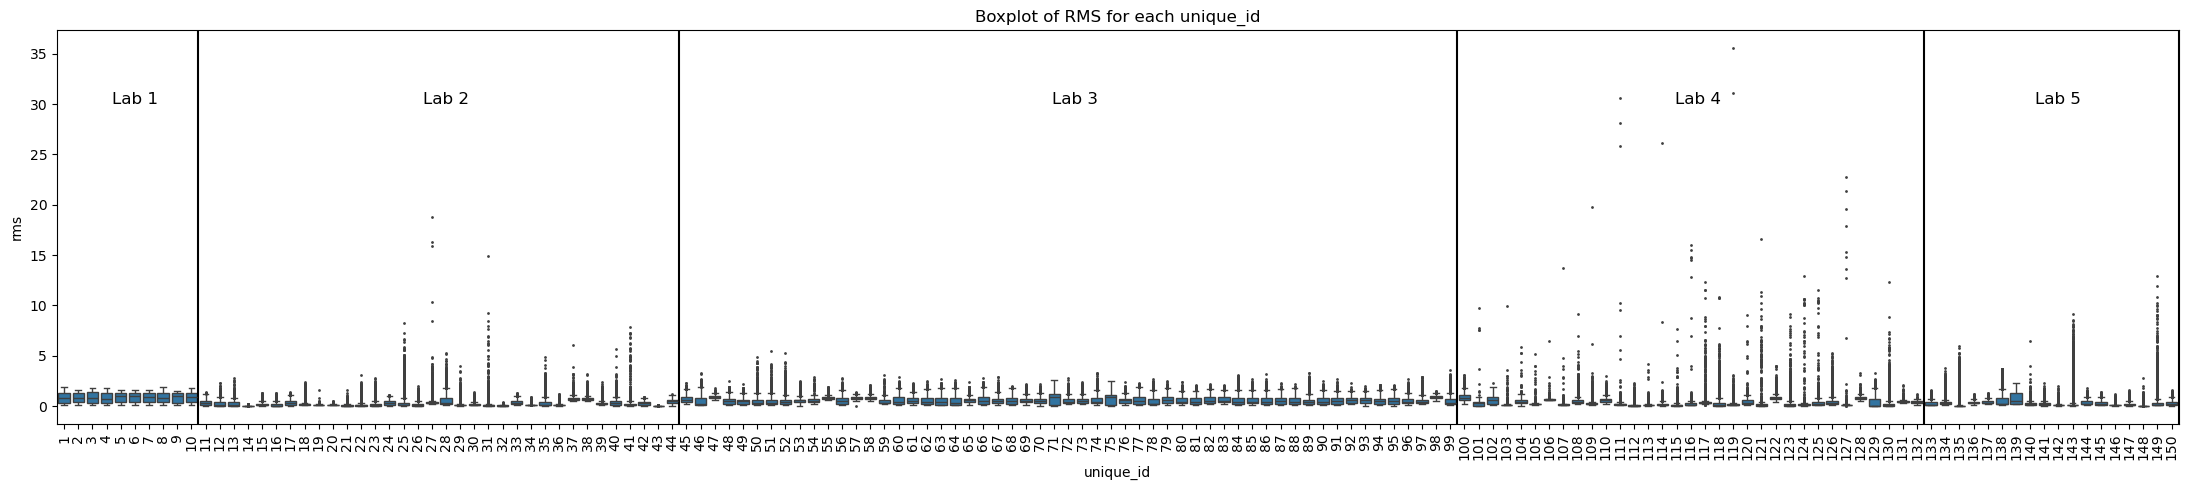

In [21]:
# boxplot RMS for each unique_id
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 5))
sns.boxplot(x='unique_id', y='rms', data=df, fliersize=1)
labindex = np.array(df.groupby('lab')['mouseID'].nunique())
labindex_cum = np.cumsum(labindex)
for i in range(len(labindex_cum)):
    plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
    plt.text(labindex_cum[i]-labindex[i]/2, 30, 'Lab ' + str(i+1), fontsize=12, ha='center')
plt.title('Boxplot of RMS for each unique_id')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

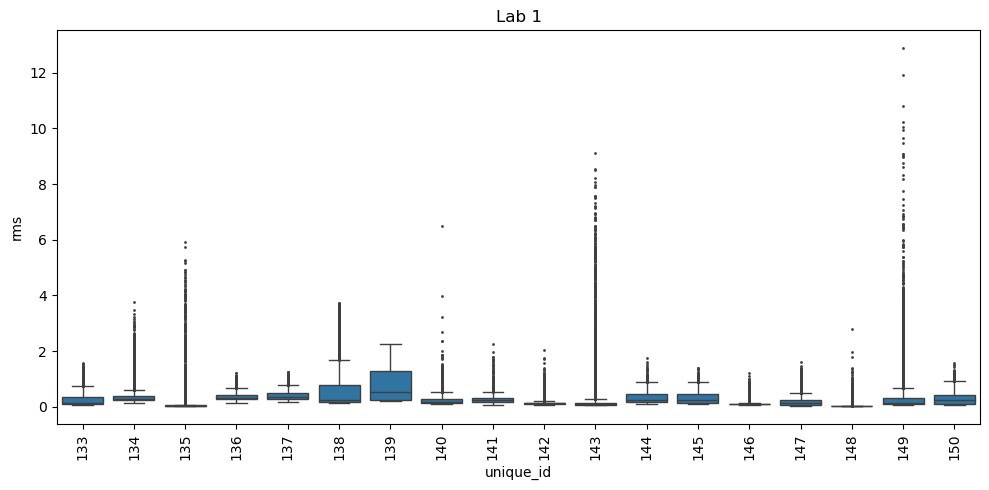

In [17]:
# show boxplot for unique_id in each lab
# lab 1
plt.figure(figsize=(10, 5))
sns.boxplot(x='unique_id', y='rms', data=df[df['lab'] == 5], fliersize=1)
plt.title('Lab 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

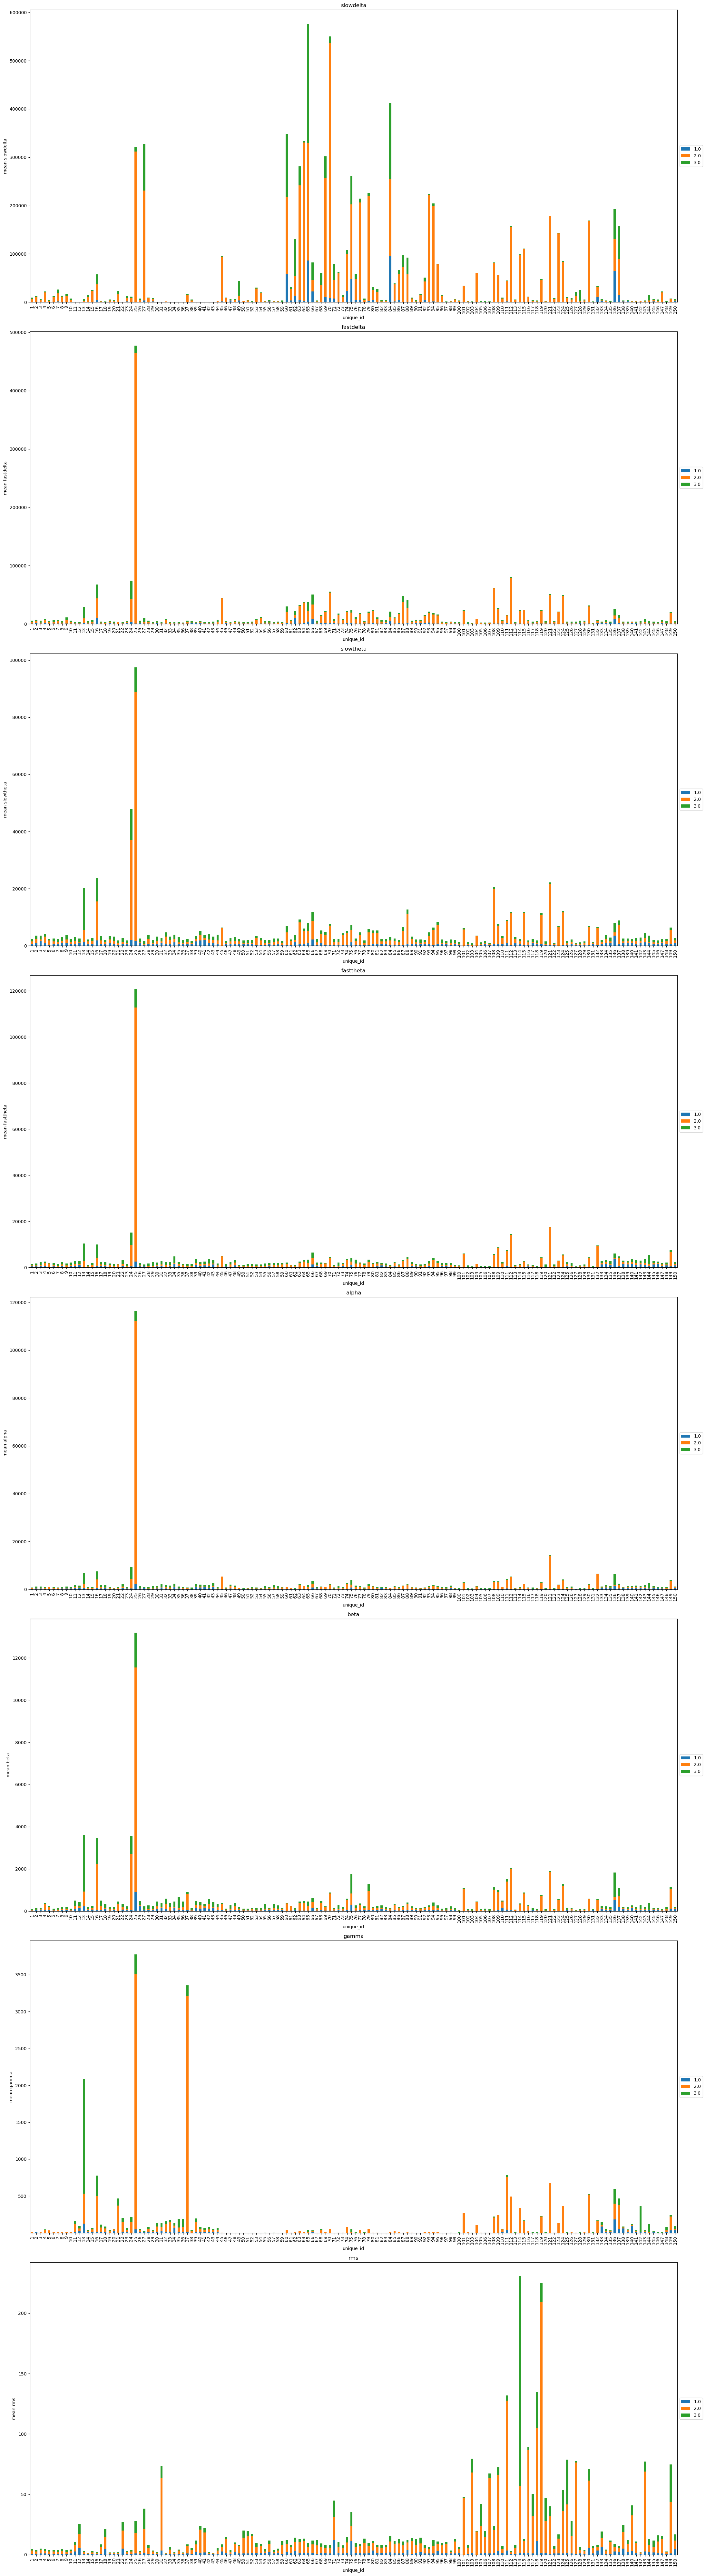

In [36]:
# do the same for the other features
features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'gamma', 'rms']

# subplot for each feature
fig, ax = plt.subplots(8, 1, figsize=(22, 80))

for i, feature in enumerate(features):
    mean_feature_by_id = df.groupby(['unique_id', 'sleepstage'])[feature].max().unstack().fillna(0)
    mean_feature_by_id.plot(kind='bar', stacked=True, ax=ax[i])
    ax[i].set_title(feature)
    ax[i].set_ylabel('mean ' + feature)
    ax[i].set_xlabel('unique_id')
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

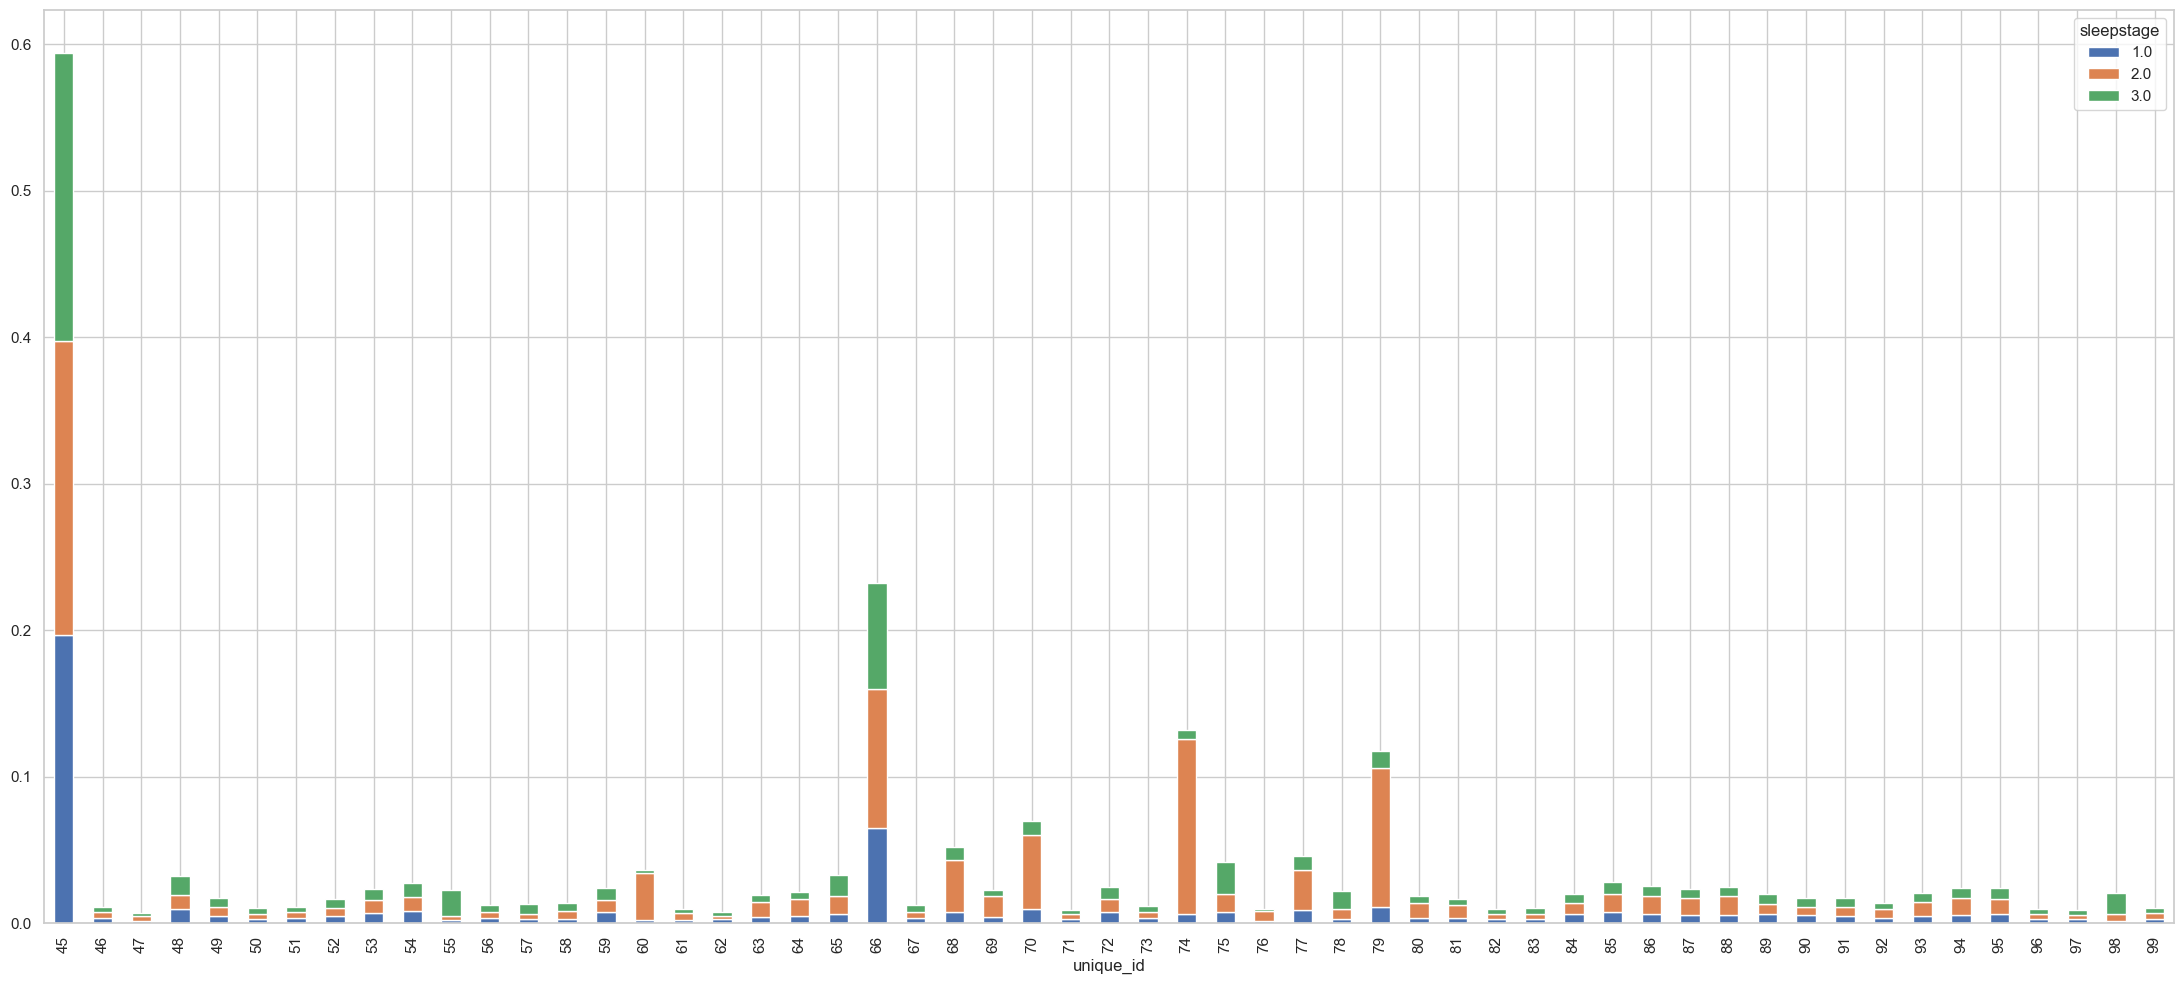

In [117]:
# show gamma for mouse 46 to 99 in the same stacked bar plot
mean_gamma_by_id = df.groupby(['unique_id', 'sleepstage'])['gamma'].mean().unstack().fillna(0)
mean_gamma_by_id[44:99].plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(22, 10)
plt.tight_layout()
plt.show()

In [116]:
# what lab is these mice from?
df[df['unique_id'].isin(range(45, 100))]['lab'].value_counts()

lab
3.0    885404
Name: count, dtype: int64

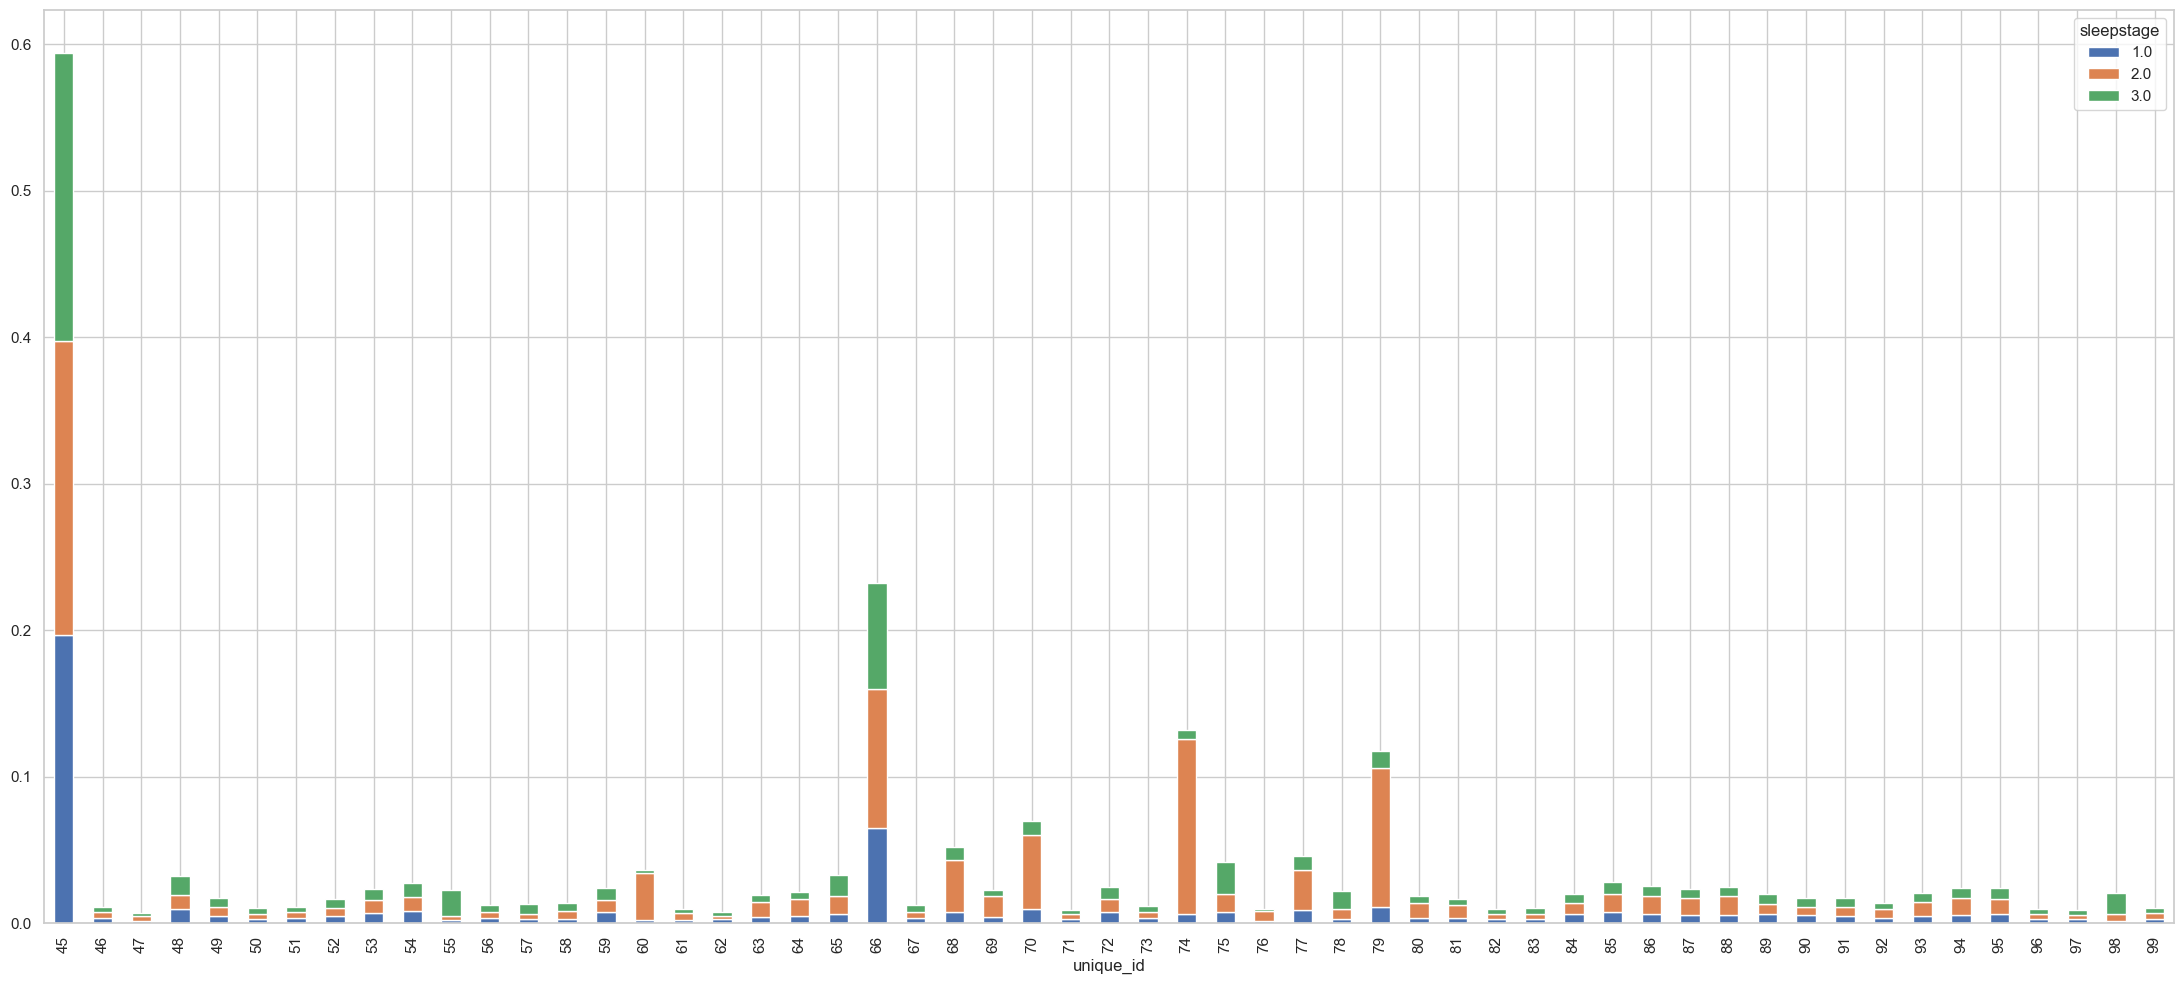

In [114]:
# show mean gamma from mice from lab 3
mean_gamma_by_id = df[df['lab'] == 3].groupby(['unique_id', 'sleepstage'])['gamma'].mean().unstack().fillna(0)
mean_gamma_by_id.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(22, 10)
plt.tight_layout()
plt.show()

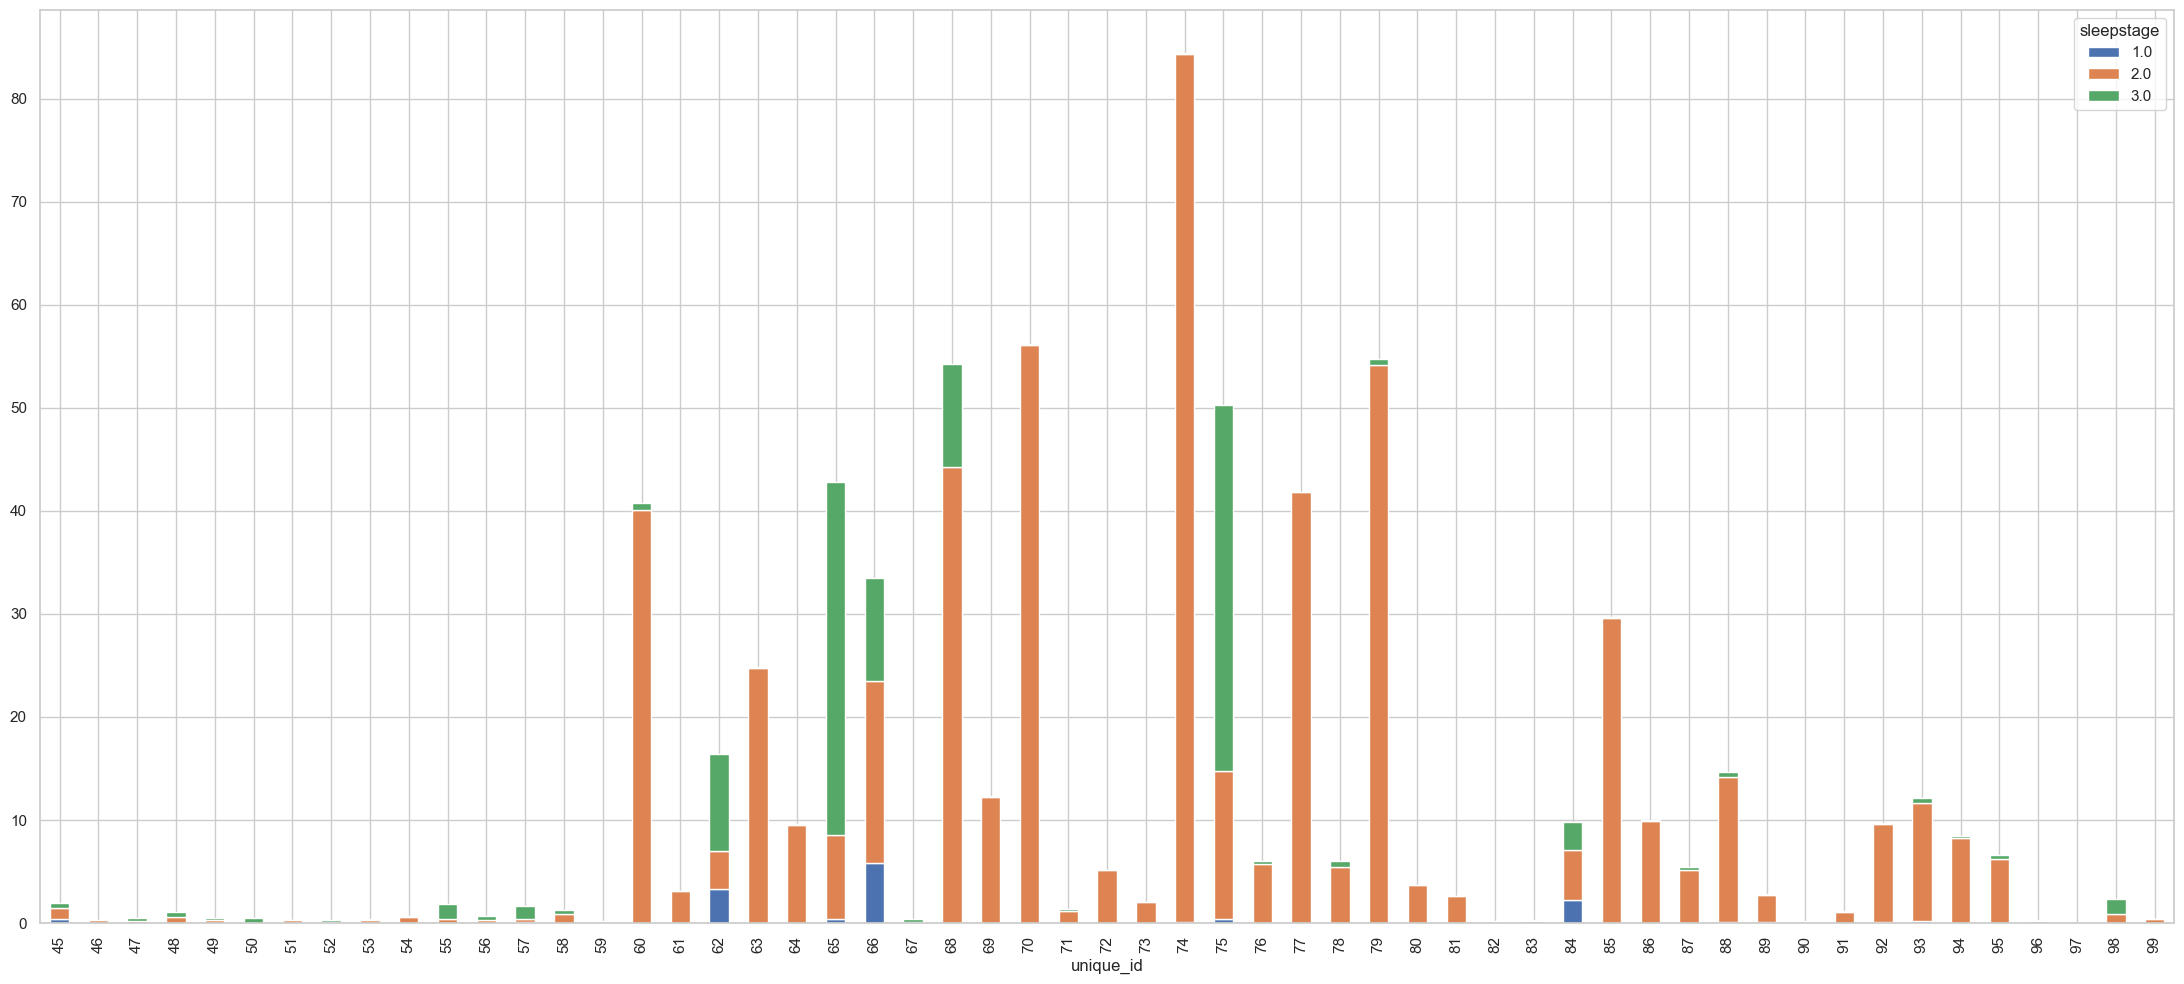

In [118]:
# show max gamma from mice from lab 3
max_gamma_by_id = df[df['lab'] == 3].groupby(['unique_id', 'sleepstage'])['gamma'].max().unstack().fillna(0)
max_gamma_by_id.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(22, 10)
plt.tight_layout()
plt.show()

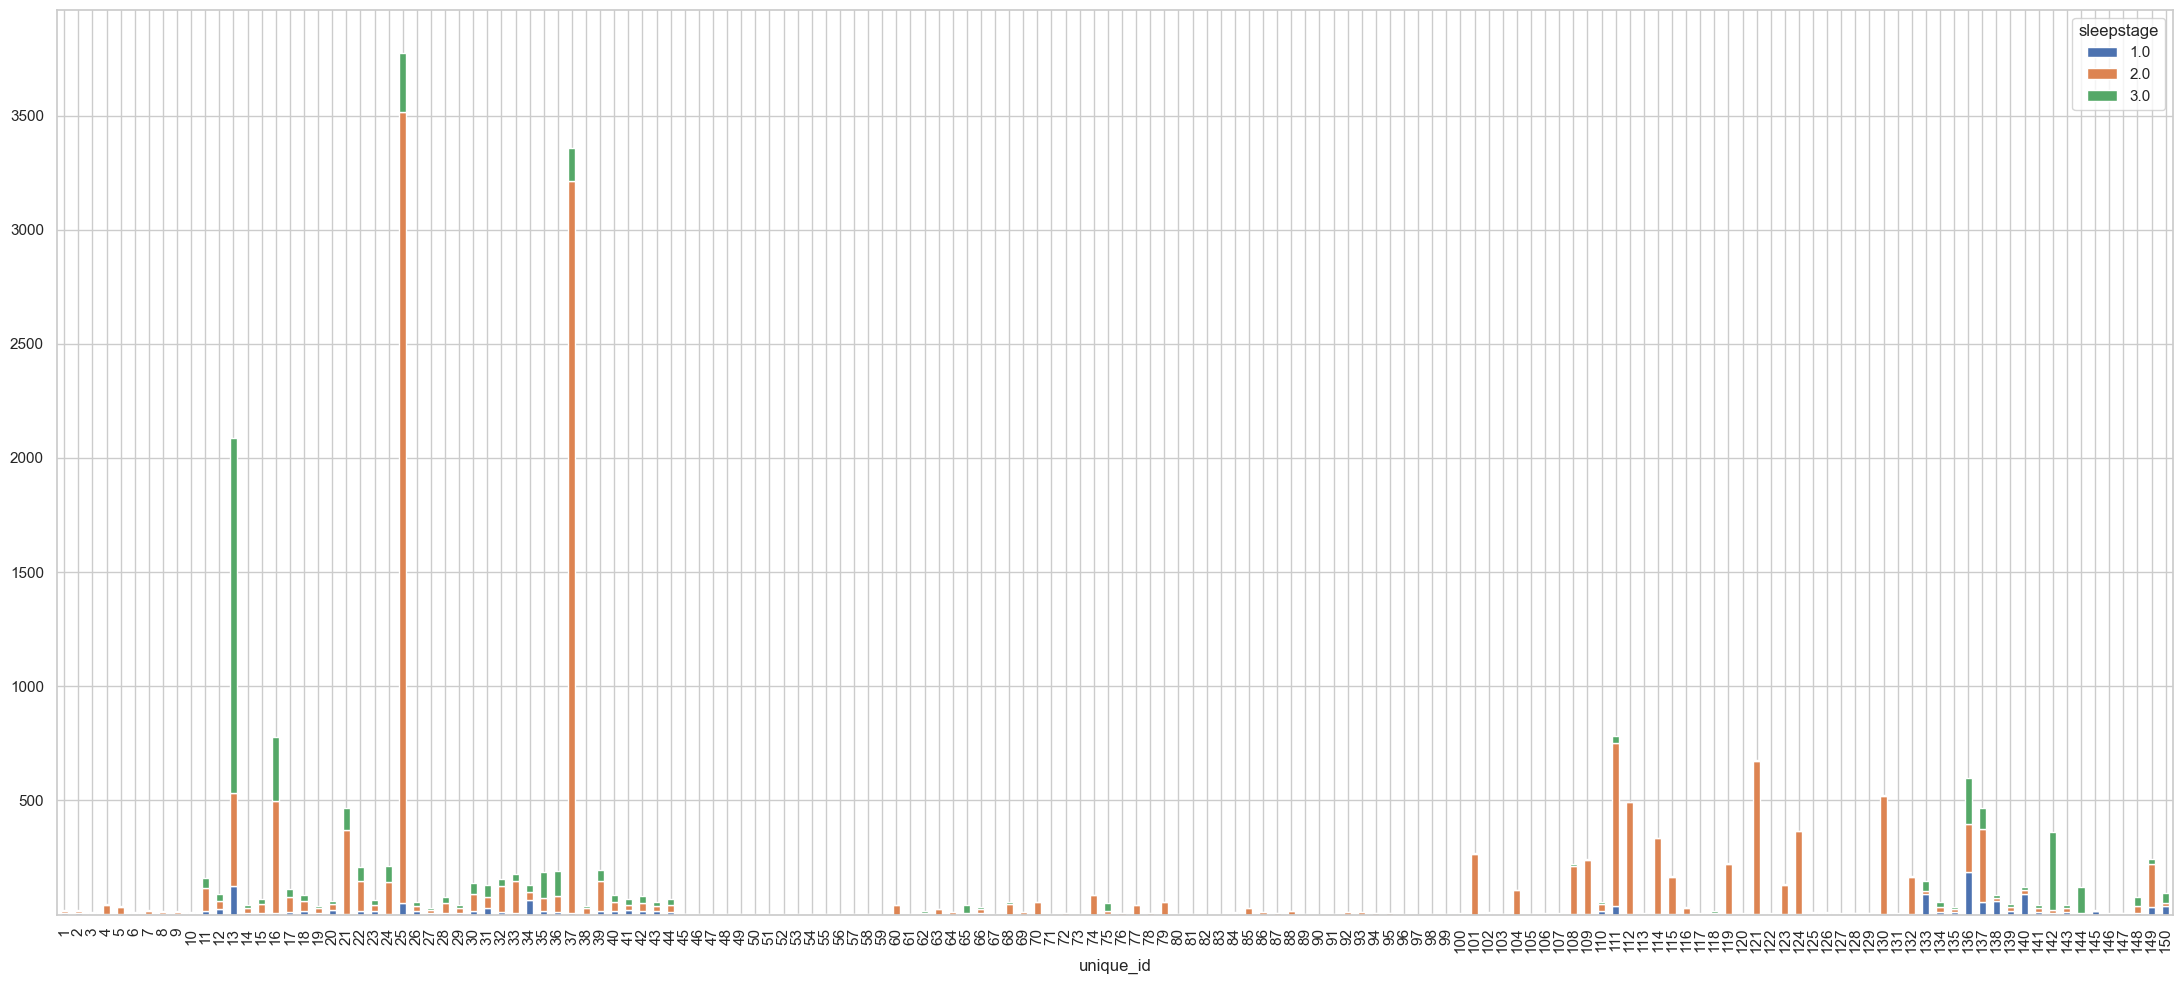

In [119]:
# show max gamma for all mice
max_gamma_by_id = df.groupby(['unique_id', 'sleepstage'])['gamma'].max().unstack().fillna(0)
max_gamma_by_id.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(22, 10)
plt.tight_layout()
plt.show()